## 4 JUNCTION QUBIT HAMILTONIAN 
                                                                                   

In this notebook we present the matrix computation of a 4-junction flux qubit hamiltonian. This allows to compute afterwards the system energies of the first 2 levels by direct diagonalization of the Hamiltonian. Moreover, we present the spectrum for a range of flux near the symmetry point, f = {0.49 . . . 0.51} and using the two-level formulation, we can fit the spectrum to obtain the persistent current. 

__Table of contents:__
1. [Computation of the 4 junction qubit hamiltonian](#Computation-of-the-4-junction-qubit-hamiltonian)

2. [System energies of the first 2 levels](#System-energies-of-the-first-2-levels)

3. [Fitting and persistent current](#Fitting-and-persistent-current)

4. [Plots](#plots)

In [34]:
# Import all libraries that we will need
import numpy as np
import matplotlib.pyplot as plt

## Computation of the 4 junction qubit hamiltonian

In [35]:
i = 225
matrix = [[0 for t in range(i)] for t in range(i)]
for i in range (0,224):
    for j in range (0,224):
            matrix[i][j]=+0j
Ec=1
EJ=100
alpha=0.35
#We define i as the index corresponding to the first Hilbert space (n in the assingment) and we define j
# as the index corresponding to the second Hilbert space (m in the assingnment)

#Matrix for f=1/2
#indiket, indjket, indibra, indjbra are to shift the Hilbert space index to a matrix index which python understands
for iket in range(-7,8):
    indiket=iket+7
    for jket in range (-7,8):
        indjket=jket+7
        for ibra in range(-7,8):
            indibra=ibra+7
            for jbra in range (-7,8):
                indjbra=jbra+7
                if (ibra==iket and jbra==jket):
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket] = Ec*2*(((iket)**2/(1+4*alpha))+jket**2)
                if (ibra==iket+1 and jbra==jket+1):
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                if ibra==iket-1 and jbra==jket-1:
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                if ibra==iket-1 and jbra==jket+1:
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                if ibra==iket+1 and jbra==jket-1:
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                                                                                   
                if (ibra==iket+2) and (jbra==jket):
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ*alpha*(np.cos(np.pi))
                if (ibra==iket-2) and (jbra==jket):
                    matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ*alpha*np.cos(np.pi)

eigenvalues = np.linalg.eigvals(matrix)
eigenvalues.sort()
print("Ground state (GHz)=",eigenvalues[0],"First-excited state (GHz)=",eigenvalues[2])
print("Energy Split (GHz)=",eigenvalues[2]-eigenvalues[0])

Ground state (GHz)= (-122.93851771143626+0j) First-excited state (GHz)= (-122.22814265118126+0j)
Energy Split (GHz)= (0.7103750602550036+0j)


In [2]:
#Checking if the matrix is hermitian (t is the number of elements that are not symmetric)
t=0
for i in range (0,224):
    for j in range (0,224):
        if matrix[i][j]!=matrix[j][i]:
            t=t+1
            print (i,j)
print(t)

0


## System energies of the first 2 levels

In [3]:
#Matrix around f=1/2 (0.49-0.51)
i = 225
matrix = [[0 for t in range(i)] for t in range(i)]
for i in range (0,224):
    for j in range (0,224):
            matrix[i][j]=+0j
Ec=1
EJ=100
alpha=0.35
plot1=[]
plot2=[]
plot3=[]
plot4=[]
#We define i as the index corresponding to the first Hilbert space (n in the assingment) and we define j
# as the index corresponding to the second Hilbert space (m in the assingnment)

#indiket, indjket, indibra, indjbra are to shift the Hilbert space index to a matrix index which python understands
for f in range (0,100):
    for iket in range(-7,8):
        indiket=iket+7
        for jket in range (-7,8):
            indjket=jket+7
            for ibra in range(-7,8):
                indibra=ibra+7
                for jbra in range (-7,8):
                    indjbra=jbra+7
                    if (ibra==iket and jbra==jket):
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket] = (Ec)*2*(((iket)**2/(1+4*alpha))+jket**2)
                    if (ibra==iket+1 and jbra==jket+1):
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                    if ibra==iket-1 and jbra==jket-1:
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                    if ibra==iket-1 and jbra==jket+1:
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                    if ibra==iket+1 and jbra==jket-1:
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ/2
                    if (ibra-1==iket+1) and (jbra==jket):
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ*alpha*(np.cos(2*np.pi*(0.49+0.0002*f))-(1j*np.sin(2*np.pi*(0.49+0.0002*f))))
                    if (ibra+1==iket-1) and (jbra==jket):
                        matrix[(indibra)*15+(indjbra)][(indiket)*15+indjket]=-EJ*alpha*(np.cos(2*np.pi*(0.49+0.0002*f))+(1j*np.sin(2*np.pi*(0.49+0.0002*f))))
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues.sort()
    plot1.append(eigenvalues[2]-eigenvalues[0])
    plot2.append(eigenvalues[0])
    plot3.append(eigenvalues[1])
    plot4.append(eigenvalues[2])

## Fitting and persistent current

Ip1= 1.0793725963433574e-07 A
Ip2= 1.0563743602177175e-07 A
-674.0372074446284
659.6754690543876


<ipython-input-42-ee9bd0312fc5>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Ip1=((float(plot1[50])-float(plot1[0]))*10**9*6.62*10**-34)/(0.01*-2*2.067*10**-15)
<ipython-input-42-ee9bd0312fc5>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  Ip2=((float(plot1[99])-float(plot1[50]))*10**9*6.62*10**-34)/(0.01*2*2.067*10**-15)
<ipython-input-42-ee9bd0312fc5>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float((plot1[50]-plot1[0])/0.01))
<ipython-input-42-ee9bd0312fc5>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float((plot1[99]-plot1[50])/0.01))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex va

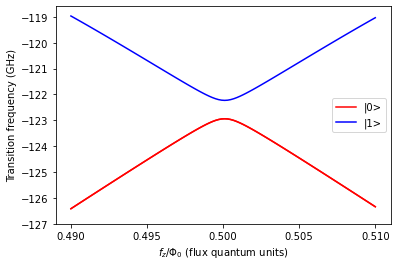

In [42]:
#Computing Ip=slope*h*10^9/(-2*phi_0) where h is the Planck constant and phi_0 is the flux quantum
x = np.linspace(0.49,0.51,100)
Ip1=((float(plot1[50])-float(plot1[0]))*10**9*6.62*10**-34)/(0.01*-2*2.067*10**-15)
print("Ip1=",Ip1,"A")
Ip2=((float(plot1[99])-float(plot1[50]))*10**9*6.62*10**-34)/(0.01*2*2.067*10**-15)
print("Ip2=",Ip2,"A")
#Fitting Ip in the plot
fit1=[]
x1=np.linspace(0.49,0.5,100)
for i in x1:
    fit1.append(-2*Ip1*2.07*10**-15*(i-0.5)/(6.62*10**-34)*10**-9)
fit2=[]
x2=np.linspace(0.5,0.51,100)
for i in x2:
    fit2.append(2*Ip2*2.07*10**-15*(i-0.5)/(6.62*10**-34)*10**-9)
print(float((plot1[50]-plot1[0])/0.01))
print(float((plot1[99]-plot1[50])/0.01))
plt.plot(x,plot2,color="red",label="|0>")
plt.plot(x,plot3,color="red")
plt.plot(x,plot4,color="blue",label="|1>")
plt.ylabel("Transition frequency (GHz)")
plt.xlabel("$f_z/\Phi_0$ (flux quantum units)")
plt.xticks(np.arange(0.49, 0.51, step=0.005))
plt.yticks(np.arange(-127, -118, step=1))
leg = plt.legend()

## Plots

([<matplotlib.axis.YTick at 0x16a7673c748>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

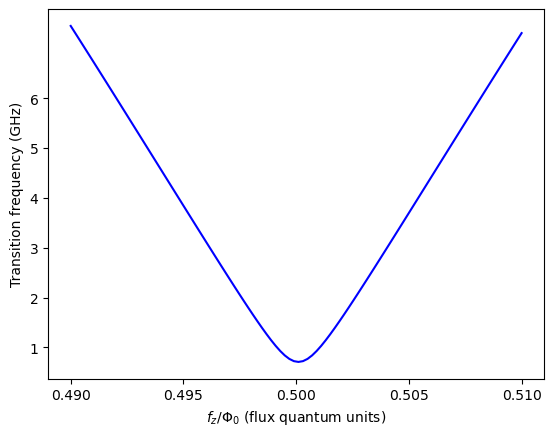

In [6]:
plt.plot(x, plot1,color="blue")
plt.ylabel("Transition frequency (GHz)")
plt.xlabel("$f_z/\Phi_0$ (flux quantum units)")
plt.xticks(np.arange(0.49, 0.51, step=0.005))
plt.yticks(np.arange(1, 7, step=1))

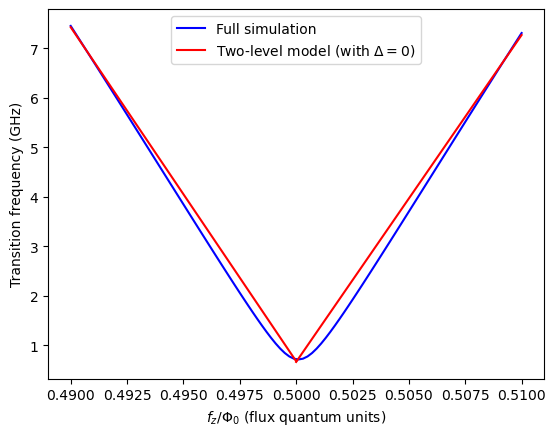

In [7]:
plt.plot(x, plot1, label = 'Full simulation',color="blue")
plt.plot(x1,fit1,label = 'Two-level model (with $\Delta=0$)',color="red")
plt.plot(x2,fit2,color="red")
plt.ylabel("Transition frequency (GHz)")
plt.xlabel("$f_z/\Phi_0$ (flux quantum units)")
plt.plot
leg = plt.legend(loc="upper center")
